# Import Library
import library yang dibutuhkan terlebih dahulu untuk pengolahan dan visualisasi data.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Data Observation
Upload dataset yang akan digunakan dan observasi.

## 1. DataFrame Train

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 2. DataFrame Test

In [4]:
df_test = pd.read_csv('test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

# Data Cleaning
## 1. Melihat jumlah data null pada dataset

In [6]:
print(df_train.isna().sum().to_string())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0


In [7]:
print(df_test.isna().sum().to_string())

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0


## 2. Melihat jumlah data duplikat pada dataset

In [8]:
df_train.duplicated().sum()
df_test.duplicated().sum()

0

## 3. Menghapus kolom ‘ID’ dari DataFrame secara permanen

In [9]:
df_test.drop('id', axis=1, inplace=True)

In [10]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


# EDA

## 1. Mendeskripsikan masing-masing dataframe

In [11]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
df_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## 2. Plotting data yang numerik dan kontinu

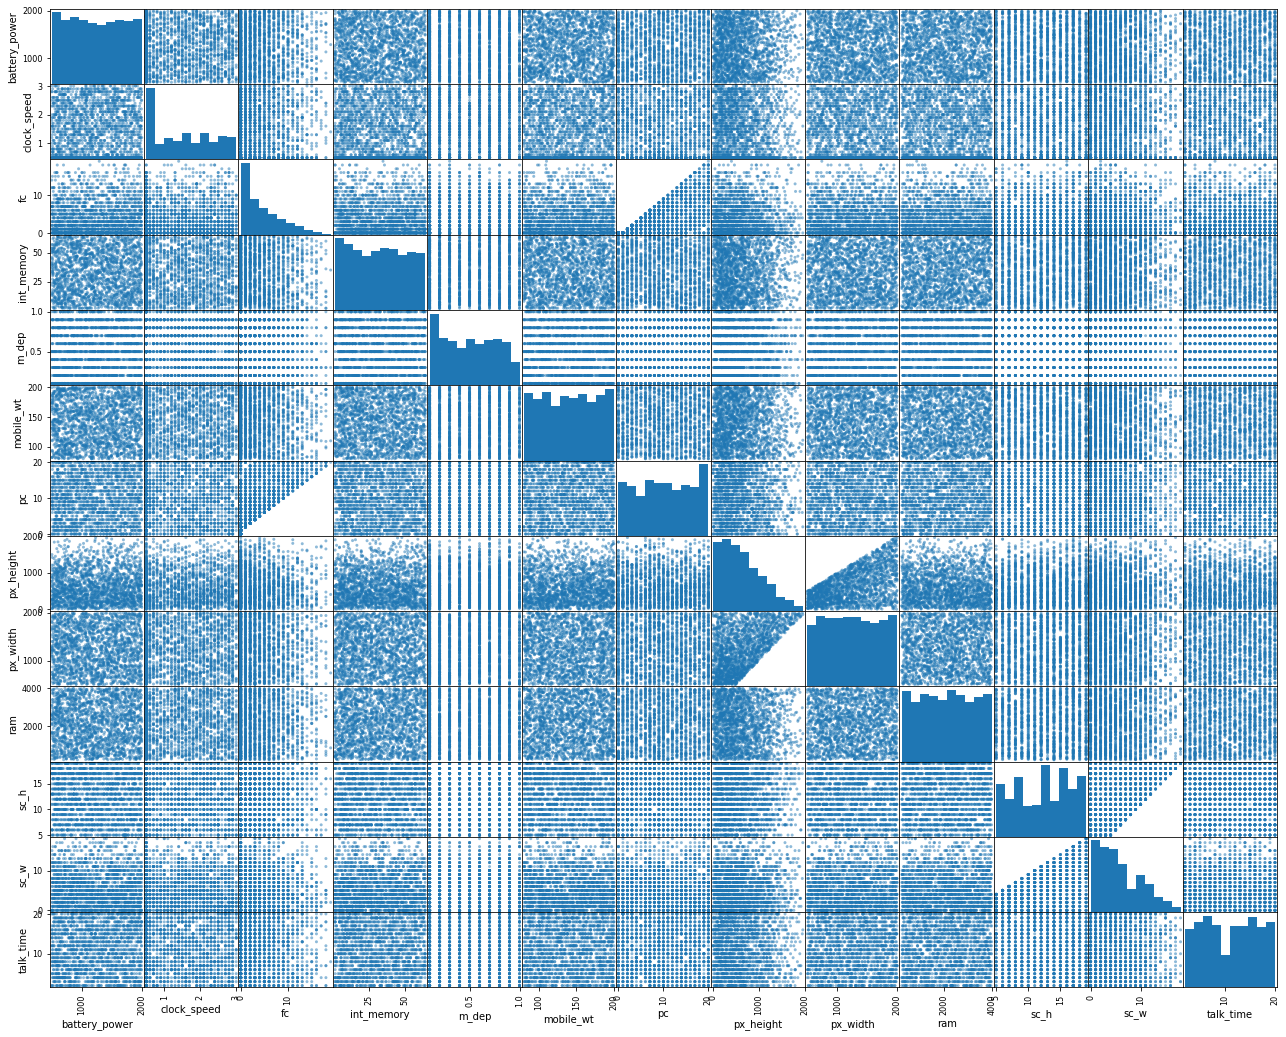

In [13]:
pd.plotting.scatter_matrix(df_train[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']], figsize=(22,18)) # plot data yang numerik dan kontinu
plt.show()

Melihat persebaran data secara kontinu

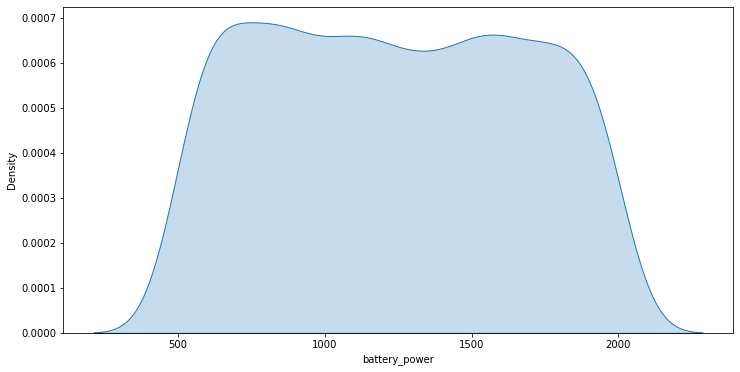

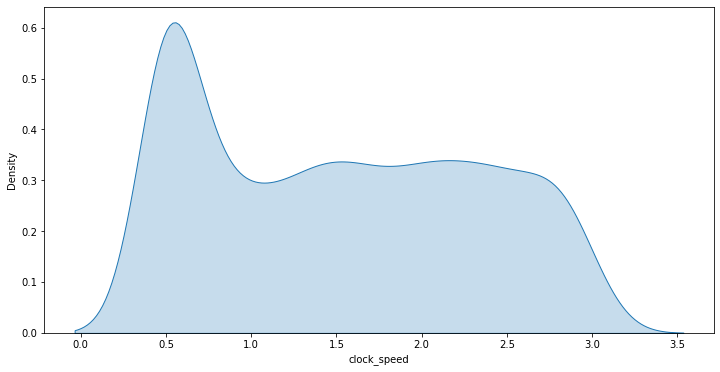

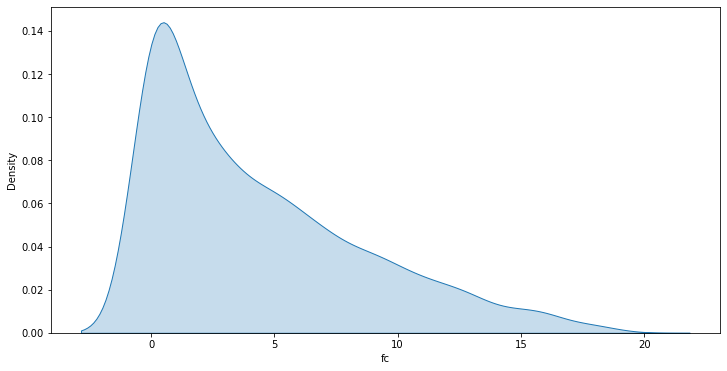

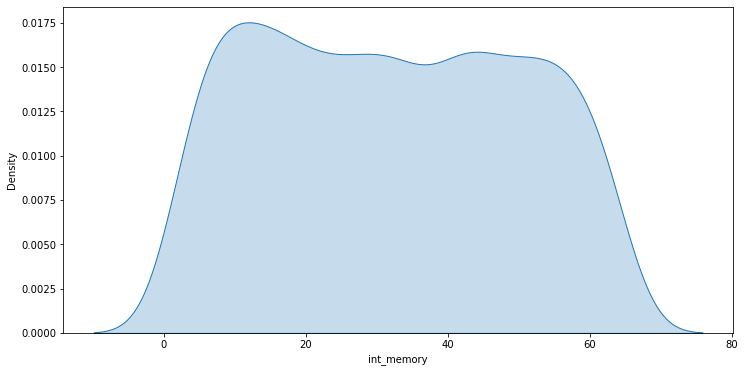

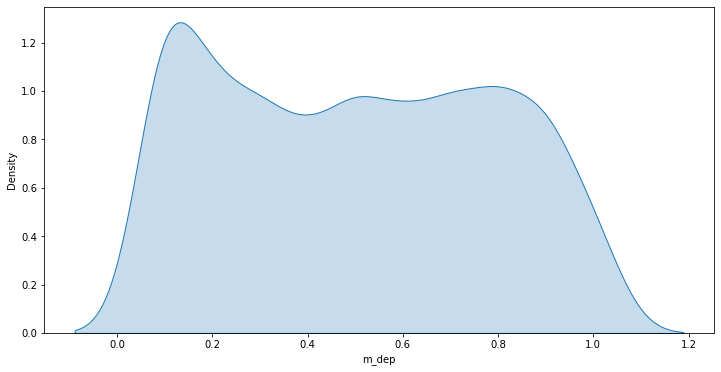

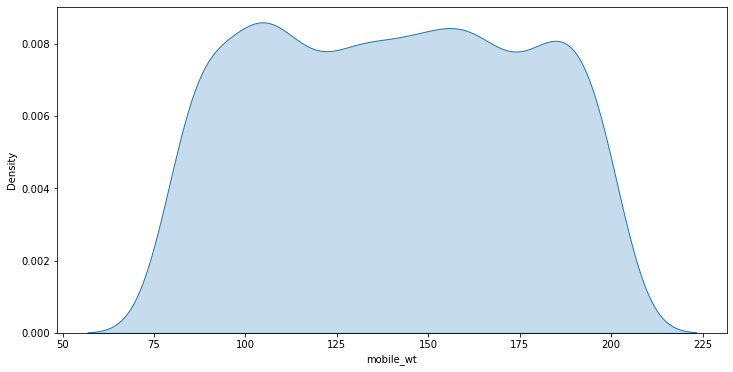

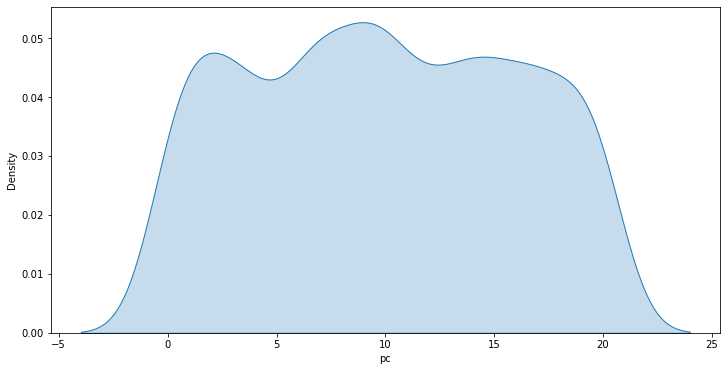

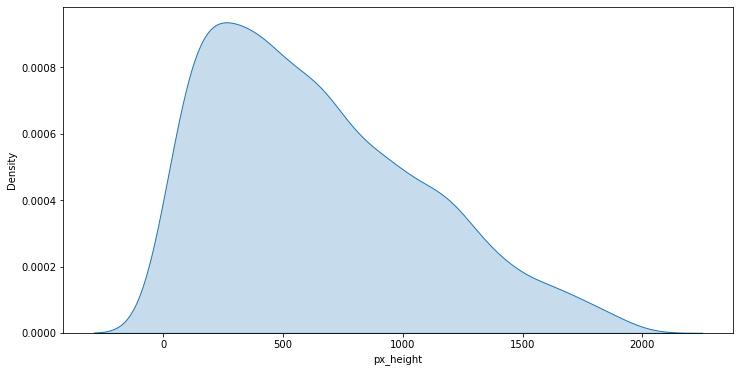

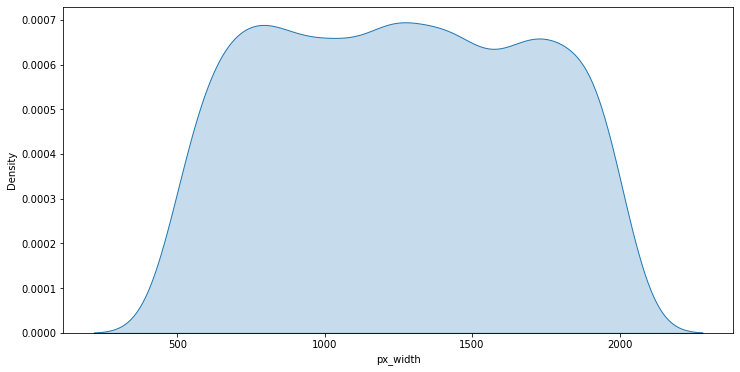

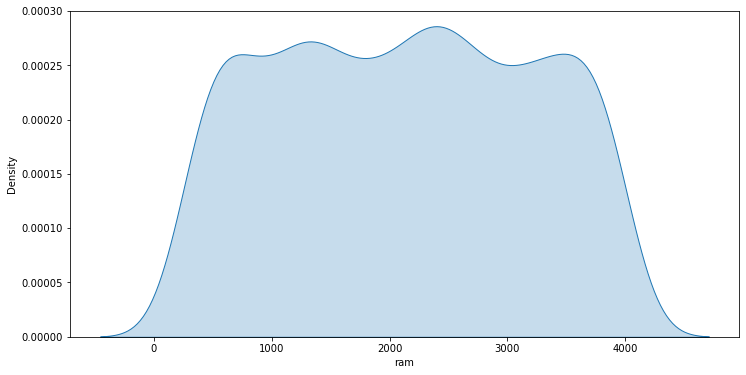

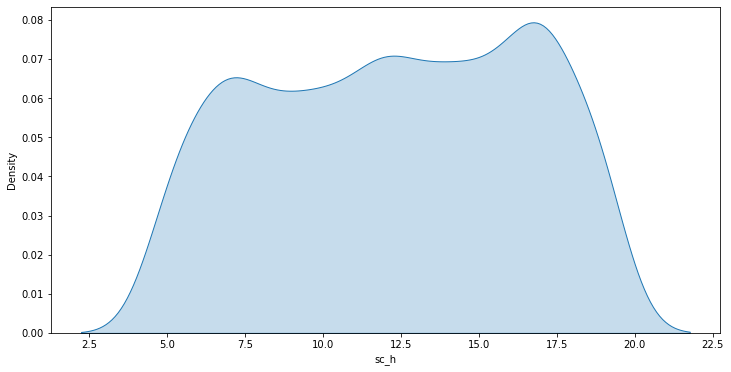

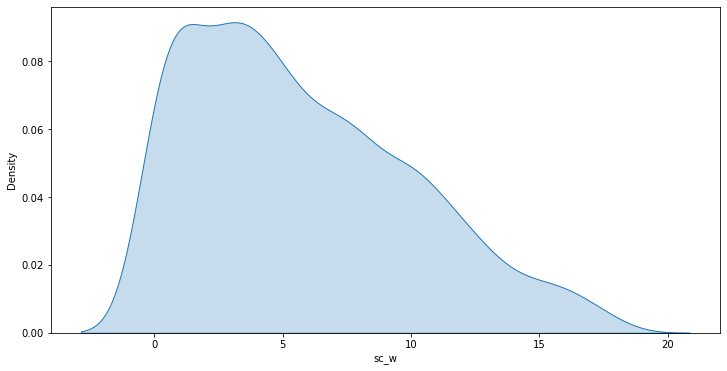

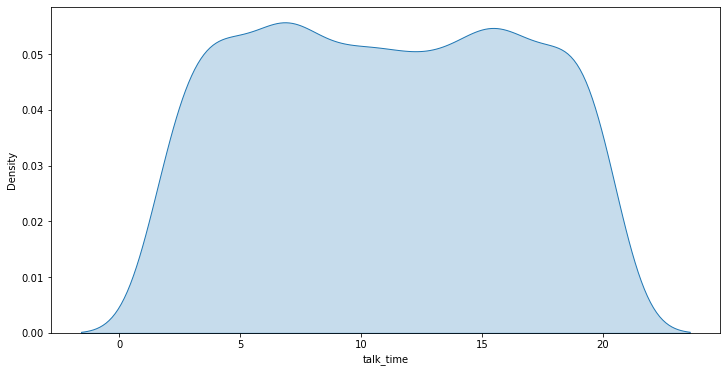

In [14]:
kontinu=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
n = len(kontinu)
for i in range (0,n) :
    plt.subplots(figsize=(12,6))
    sns.kdeplot(data=df_train, x=kontinu[i], shade=True)
    plt.show()

## 3. Melihat korelasi antar fitur
Sebelum dilihat korelasi antar fitur, alangkah baiknya data discaling terlebih dahulu.

menggunakan library sklearn MinMaxScaler pada skala 0-3 karena price_range dari 0-3 untuk men-scaling semua data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,3))

In [16]:
dftrain_scaled = pd.DataFrame(data=scaler.fit_transform(df_train), columns=df_train.columns)
dftrain_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.683367,0.0,2.04,0.0,0.157895,0.0,0.241935,1.666667,2.700,0.428571,...,0.030612,0.512684,1.838322,0.857143,1.166667,2.833333,0.0,0.0,3.0,1.0
1,1.042084,3.0,0.00,3.0,0.000000,3.0,2.467742,2.000000,1.400,0.857143,...,1.385204,2.979973,1.904062,2.571429,0.500000,0.833333,3.0,3.0,0.0,2.0
2,0.124248,3.0,0.00,3.0,0.315789,3.0,1.887097,2.666667,1.625,1.714286,...,1.933163,2.435247,1.881614,1.285714,0.333333,1.166667,3.0,3.0,0.0,2.0
3,0.228457,3.0,2.40,0.0,0.000000,0.0,0.387097,2.333333,1.275,2.142857,...,1.861224,2.575434,2.014698,2.357143,1.333333,1.500000,3.0,0.0,0.0,2.0
4,2.645291,3.0,0.84,0.0,2.052632,3.0,2.032258,1.666667,1.525,0.428571,...,1.848980,1.425901,0.925975,0.642857,0.333333,2.166667,3.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.587174,3.0,0.00,3.0,0.000000,3.0,0.000000,2.333333,0.650,2.142857,...,1.870408,2.783712,0.330305,1.714286,0.666667,2.833333,3.0,3.0,0.0,0.0
1996,2.933868,3.0,2.52,3.0,0.000000,0.0,1.790323,0.333333,2.675,1.285714,...,1.400510,2.933912,1.423838,1.285714,1.666667,2.333333,3.0,3.0,3.0,2.0
1997,2.825651,0.0,0.48,3.0,0.157895,3.0,1.645161,2.000000,0.700,3.000000,...,1.328571,2.267023,2.245591,0.857143,0.166667,0.500000,3.0,3.0,0.0,3.0
1998,2.026052,0.0,0.48,0.0,0.631579,3.0,2.129032,0.000000,1.625,1.714286,...,0.514286,0.340454,0.491448,2.785714,1.666667,2.833333,3.0,3.0,3.0,0.0


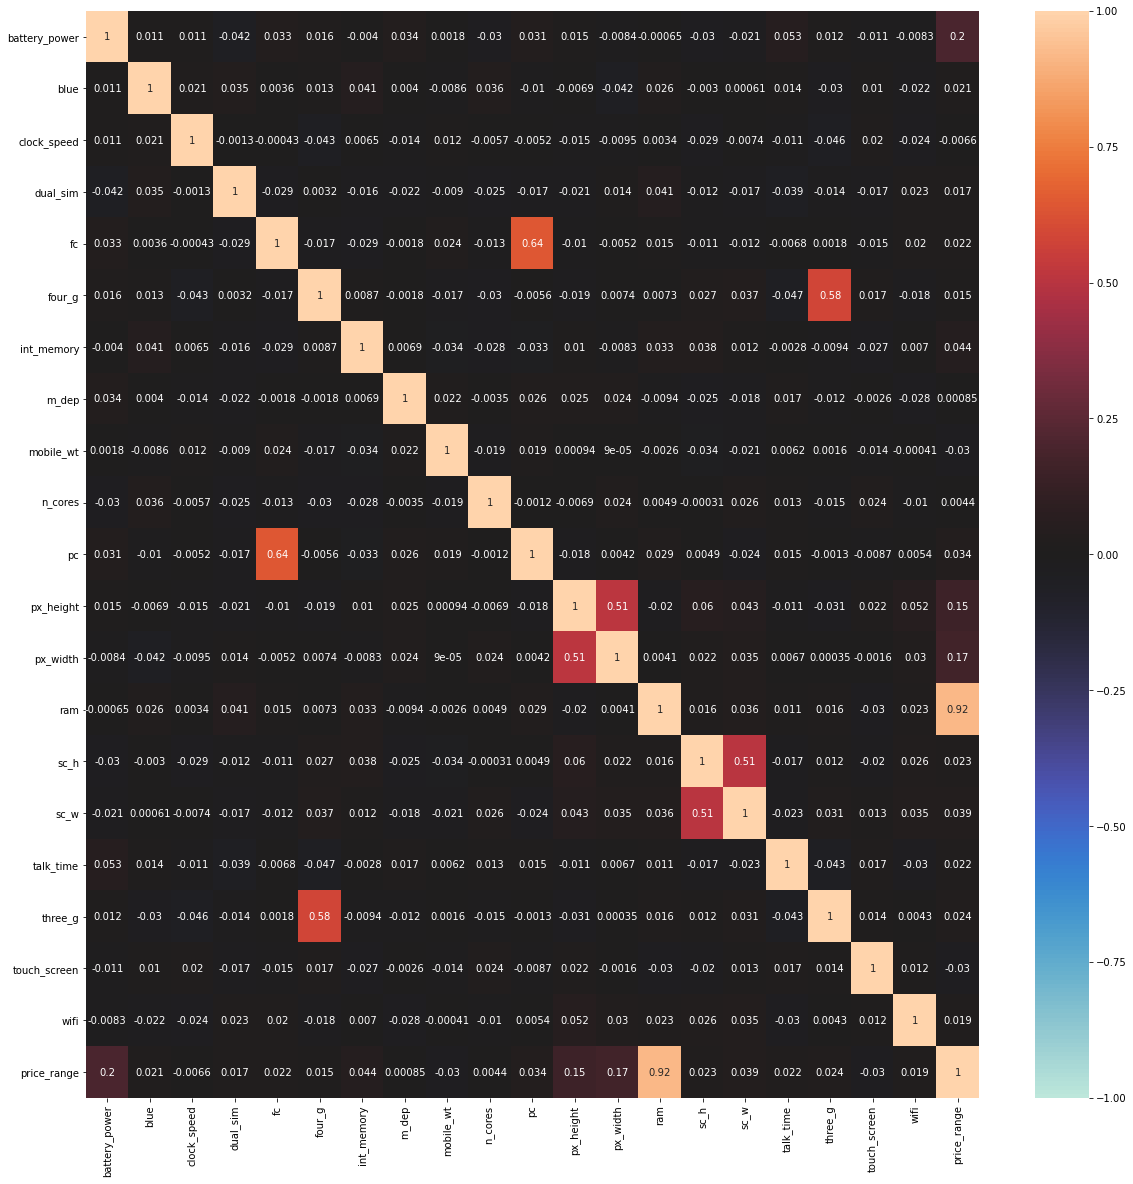

In [17]:
corr = dftrain_scaled.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

## 4. Plotting Data Kategorik atau Integer
Kolom-kolom yang berisi data kategorik atau integer seperti blue, dual_sim, n_cores, four_g, three_g, touch_screen, dan wifi harus diplot menggunakan countplot karena kategorik bukan numerik. Lihat relasi antara masing-masing kolom kategorik atau integer dengan kolom target.

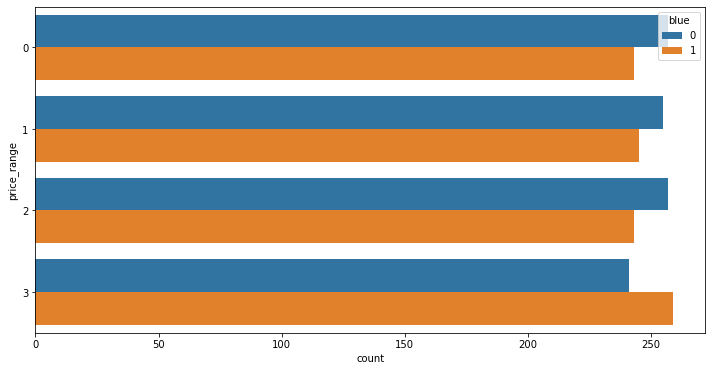

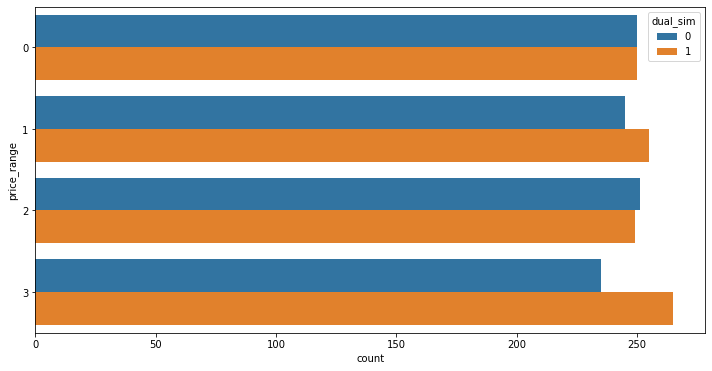

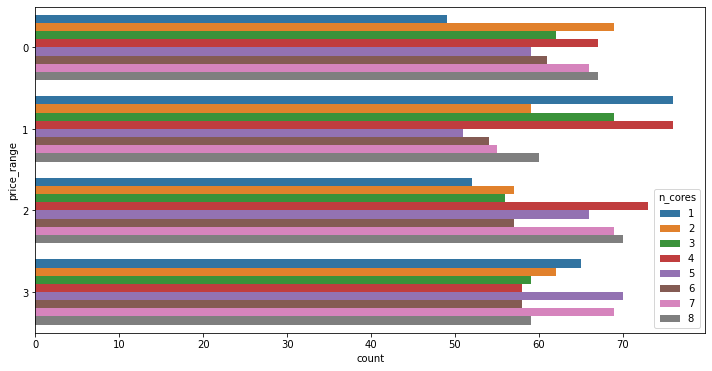

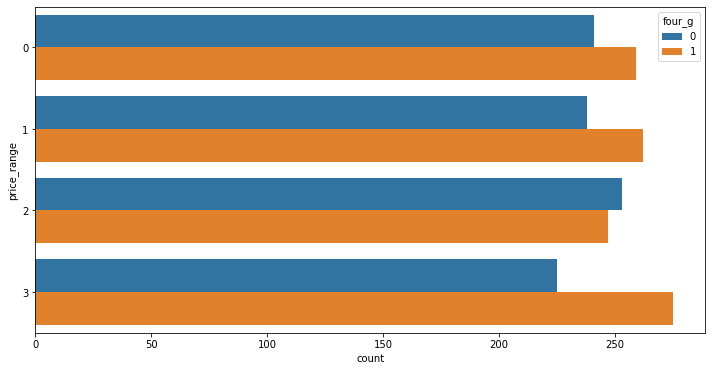

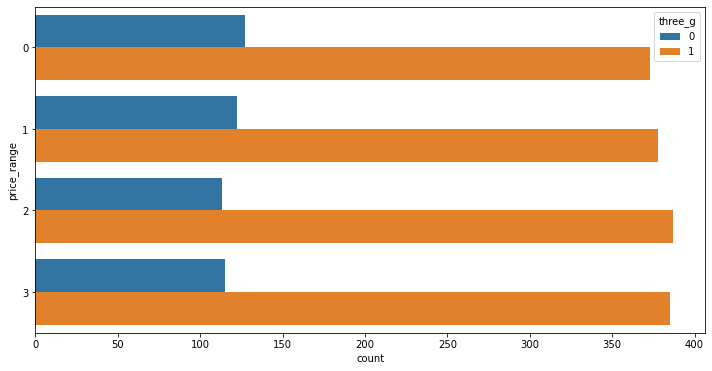

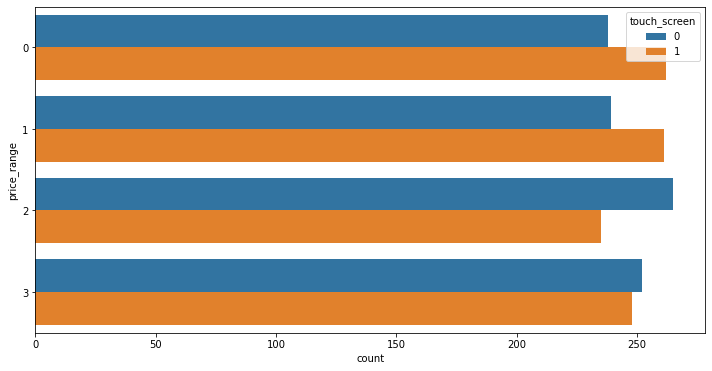

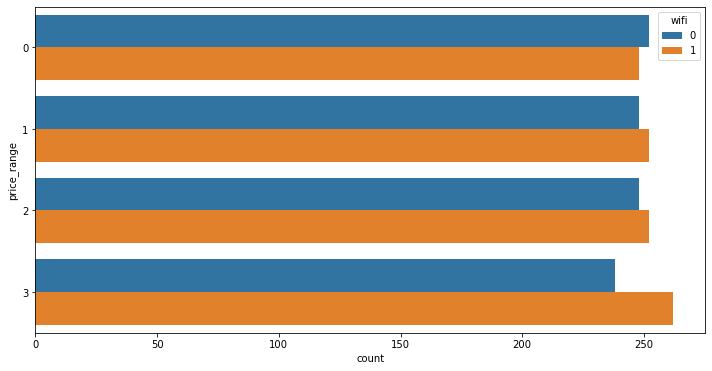

In [18]:
kategorikatauinteger=['blue', 'dual_sim', 'n_cores', 'four_g', 'three_g', 'touch_screen', 'wifi']
n = len(kategorikatauinteger)
for i in range (0,n) :
    plt.subplots(figsize=(12,6))
    sns.countplot(data=df_train, y='price_range', hue=kategorikatauinteger[i])
    plt.show()

# Data Preprocessing
Pilih fitur independen dan dependen

In [45]:
x = df_train.drop('price_range',axis=1).copy()
y = df_train['price_range']

In [46]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [47]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Kita lakukan scaling untuk semua fitur independen

In [50]:
scaler01 = MinMaxScaler(feature_range=(0,1))
X_train = pd.DataFrame(data=scaler01.fit_transform(X_train), columns=X_train.columns)
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.949900,0.0,0.00,1.0,0.368421,0.0,0.709677,0.444444,0.925000,0.000000,0.50,0.391327,0.840454,0.329144,0.357143,0.500000,0.055556,1.0,1.0,1.0
1,0.088176,1.0,0.68,0.0,0.000000,1.0,0.758065,0.000000,0.491667,1.000000,0.05,0.269898,0.339786,0.882888,0.428571,0.055556,0.777778,1.0,1.0,1.0
2,0.490982,0.0,0.16,1.0,0.105263,1.0,0.887097,0.000000,0.900000,0.000000,0.70,0.263776,0.206275,0.306952,0.642857,0.666667,1.000000,1.0,0.0,1.0
3,0.187041,0.0,0.24,0.0,0.105263,0.0,0.580645,0.333333,0.983333,0.571429,0.35,0.155102,0.783712,0.868984,0.571429,0.444444,0.166667,0.0,0.0,1.0
4,0.637943,1.0,0.00,1.0,0.368421,0.0,0.080645,0.333333,0.208333,0.571429,0.60,0.419898,0.403204,0.355348,0.071429,0.277778,1.000000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.984636,1.0,0.56,1.0,0.105263,0.0,0.467742,0.888889,0.591667,0.000000,0.85,0.395408,0.738985,0.739037,0.571429,0.277778,0.944444,0.0,0.0,1.0
1596,0.058784,1.0,0.00,0.0,0.052632,1.0,0.919355,0.666667,0.550000,1.000000,0.20,0.387245,0.906542,0.027807,0.785714,0.555556,0.222222,1.0,1.0,1.0
1597,0.887108,1.0,0.00,0.0,0.000000,1.0,0.209677,0.333333,0.666667,0.571429,0.35,0.371939,0.512016,0.487166,0.785714,0.611111,0.555556,1.0,0.0,1.0
1598,0.952572,0.0,0.16,1.0,0.157895,0.0,0.145161,0.333333,0.916667,1.000000,0.60,0.250510,0.671562,0.710695,0.785714,0.611111,0.888889,0.0,1.0,1.0


# Feature Engineering dan Model Selection
Disini kita akan memilih fitur independen yang paling baik untuk dijadikan model. Selain itu kita juga memilih Model yang terbaik.

Dengan menggunakan library sklearn SelectKBest untuk mencari fitur independen terbaik.

In [51]:
log_regr = LogisticRegression(max_iter=4000)
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [52]:
from sklearn.feature_selection import SelectKBest, chi2

In [53]:
col = list(X_train.columns)

In [54]:
for i in range (1,len(col)):
    kbest = SelectKBest(score_func=chi2, k=i)
    Xbest = kbest.fit_transform(x, y)
    bestfeatures = x.columns[kbest.get_support()]
    df_bestfeatures = x[bestfeatures]
    
    X_train, X_test, y_train, y_test = train_test_split(df_bestfeatures, y, test_size=0.2, random_state=42)
    # melakukan cross validation pada masing-masing metode
    lr_score = cross_val_score(log_regr, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    svc_score = cross_val_score(svc, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    dt_score = cross_val_score(dt, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    rf_score = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy').mean()
    
    print('Ketika i = ',i)
    for j in [lr_score, svc_score, dt_score, rf_score]:
        print(j)

Ketika i =  1
0.7562500000000001
0.75375
0.6756249999999999
0.675625
Ketika i =  2
0.7925
0.78625
0.709375
0.7618750000000001
Ketika i =  3
0.911875
0.9049999999999999
0.838125
0.8725
Ketika i =  4
0.9568749999999999
0.94625
0.846875
0.90625
Ketika i =  5
0.971875
0.949375
0.8462500000000001
0.9112500000000001


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ketika i =  6
0.975625
0.948125
0.8400000000000001
0.8987499999999999


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  7
0.78
0.94875
0.839375
0.8956250000000001


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  8
0.71375
0.946875
0.835625
0.889375


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  9
0.865
0.94875
0.8325
0.899375


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  10
0.730625
0.9475
0.8400000000000001
0.895


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  11
0.746875
0.9475
0.834375
0.889375


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  12
0.7006249999999999
0.94625
0.83
0.874375


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  13
0.7168749999999999
0.94625
0.83
0.881875


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  14
0.7074999999999999
0.94625
0.8331249999999999
0.8775


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  15
0.713125
0.9450000000000001
0.8337500000000001
0.874375


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  16
0.7150000000000001
0.945625
0.8256249999999999
0.88375


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Ketika i =  17
0.70875
0.94625
0.829375
0.8818750000000001


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 

Dari hasil cross validation pada masing-masing metode dan dari masing-masing jumlah fitur yang dipilih atau k, dipilih k=6 dan metode yang dipakai adalah LogisticRegression karena scorenya paling tinggi di antara yang lain.

In [55]:
kbest = SelectKBest(score_func=chi2, k=6)
Xbest = kbest.fit_transform(x, y)
bestfeatures = x.columns[kbest.get_support()]
df_bestfeatures = x[bestfeatures]

X_train, X_test, y_train, y_test = train_test_split(df_bestfeatures, y, test_size=0.2, random_state=42)

# Modelling


In [56]:
X_train

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
968,1923,46,191,767,1759,1489
240,633,49,139,529,1009,3560
819,1236,57,188,517,809,1406
692,781,38,198,304,1674,3508
420,1456,7,105,823,1104,1587
...,...,...,...,...,...,...
1130,1975,31,151,775,1607,3022
1294,589,59,146,759,1858,362
860,1829,15,160,729,1267,2080
1459,1927,11,190,491,1506,2916


In [57]:
model = log_regr
model.fit(X_train,y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=4000)

In [58]:
y_pred = model.predict(X_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

# Model Evaluation

In [59]:
accuracy_score(y_test,y_pred)

0.985

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluation_parametrics(name,y_val, y_pred):
    
    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))   
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.98      0.98      0.98        92
           3       1.00      0.98      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

--------------------------------------------------------------------------


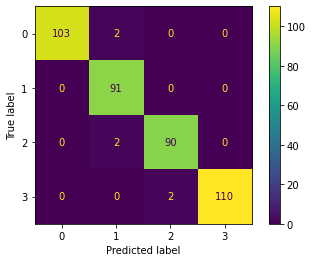

In [61]:
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

Perbandingan data actual dan data prediksi

In [62]:
print(np.concatenate((y_test.values.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [3 2]

# Features Important

In [69]:
X_test

,battery_power,int_memory,mobile_wt,px_height,px_width,ram
1860,1646,25,200,211,1608,686
353,1182,8,138,275,986,2563
1333,1972,14,196,293,952,1316
905,989,17,166,256,1394,3892
1289,615,58,130,1021,1958,1906
...,...,...,...,...,...,...
965,1379,19,134,387,671,3912
1284,991,12,158,1209,1678,2014
1739,1044,12,104,1230,1263,1794
261,728,25,88,526,1529,2039


In [63]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                scoring='accuracy', random_state=42)

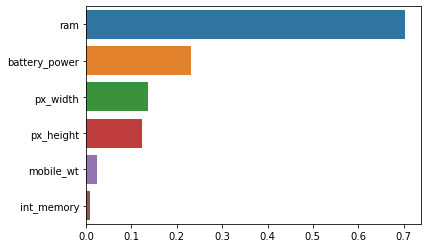

In [64]:
result_sorted = []
columns_sorted = []

for res, col in sorted(zip(result.importances_mean, X_test.columns.values), reverse=True):
  result_sorted.append(res)
  columns_sorted.append(col)

sns.barplot(x = result_sorted, y = columns_sorted)
plt.show()

# Prediksi test.csv

In [65]:
Xtest_test = df_test[bestfeatures]

In [66]:
ytest_pred = model.predict(Xtest_test)

In [67]:
ytest_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# Save Model
Simpan model ke dalam file dan model siap digunakan untuk predict

In [68]:
import joblib
joblib.dump(model,'model_LogiscticRegression.pkl')

['model_LogiscticRegression.pkl']